# Note

* All airline, all price
* 2023-07-13 : initial: all airlines, remove outlier, LR, simplify isotonic
* 2023-07-30 : remove 30 days fitting, update simplify isotonic
* 2023-08-11 : update get_slope, get_intercept, get_linear_equation, equations
* 2023-08-12 : add y_hat for LR

# Setup

In [1]:
import os
import pandas as pd
from datetime import datetime, date
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

# get_slope

In [2]:
def get_slope(x1, y1, x2, y2):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b1 = ((y1-mean_y)*(x1-mean_x) + (y2-mean_y)*(x2-mean_x))/(math.pow(x1-mean_x,2) + math.pow(x2-mean_x,2))
    return b1

In [3]:
get_slope(2, 3, 6, 7)

1.0

# get_intercept

In [4]:
def get_intercept(x1, y1, x2, y2, b1):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b0 = mean_y - b1*mean_x
    return b0

In [5]:
get_intercept(2, 3, 6, 7, get_slope(2, 3, 6, 7))

1.0

# get_linear_equation

In [6]:
# b0 : intercept
# b1 : slope
# y = b0 + b1*x
def get_linear_equation(b0,b1):
    if b1 != 0 :
        if b1 > 0:
            print('y = %.2f' % b0, '+ %.2f' % b1, '*x' )
        else:
            print('y = %.2f' % b0, ' %.2f' % b1, '*x' )
    else : 
        print('y = %.2f' % b0 )

In [7]:
get_linear_equation(2.3333,4.567)

y = 2.33 + 4.57 *x


# 60 days prior

## Read CSV

In [8]:
folder = 'C:\\Users\\Pleng Weerada\\Documents\\MSc Project\\flight_data_60days\\data_files_for_model\\'

In [9]:
# ref : https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
file_name = folder + 'ticket_price_HND_direct__2023-07-12_16-13-37.csv'
df = pd.read_csv(file_name)

In [10]:
df

route       airline_nm  direct depart_dt col_pre_depart_dt  \
0    LON-to-HND              ANA  direct      24/5        2023-05-24   
1    LON-to-HND              ANA  direct      24/5        2023-05-24   
2    LON-to-HND              ANA  direct      24/5        2023-05-24   
3    LON-to-HND              ANA  direct      24/5        2023-05-24   
4    LON-to-HND              ANA  direct      24/5        2023-05-24   
..          ...              ...     ...       ...               ...   
398  LON-to-HND              ANA  direct      30/5        2023-05-30   
399  LON-to-HND  British Airways  direct      30/5        2023-05-30   
400  LON-to-HND              ANA  direct      30/5        2023-05-30   
401  LON-to-HND  British Airways  direct      30/5        2023-05-30   
402  LON-to-HND              ANA  direct      30/5        2023-05-30   

      search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0    2023-03-25                 -60         908.0                 910.0   
1    2023-03-26                 -59         909.0                 910.0   
2    2023-03-27                 -58         909.0                 910.0   
3    2023-03-28                 -57         908.0                 910.0   
4    2023-03-29                 -56         906.0                 910.0   
..          ...                 ...           ...                   ...   
398  2023-05-27                  -3         875.0                 923.0   
399  2023-05-27                  -3        1059.0                1067.0   
400  2023-05-28                  -2         875.0                 923.0   
401  2023-05-28                  -2        1059.0                1067.0   
402  2023-05-29                  -1         918.0                 923.0   

     col_saving_rate col_day_of_week  
0           0.219780       Wednesday  
1           0.109890       Wednesday  
2           0.109890       Wednesday  
3           0.219780       Wednesday  
4           0.439560       Wednesday  
..               ...             ...  
398         5.200433         Tuesday  
399         0.749766         Tuesday  
400         5.200433         Tuesday  
401         0.749766         Tuesday  
402         0.541712         Tuesday  

[403 rows x 11 columns]

## plot graph

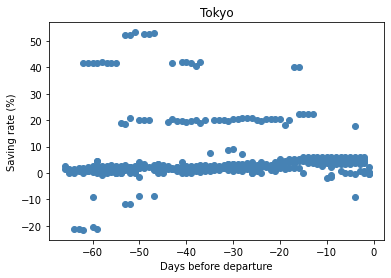

In [11]:
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

## Remove outlier

In [12]:
# taken from : https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
median = df['col_saving_rate'].quantile(0.5)
Q1 = df['col_saving_rate'].quantile(0.25)
Q3 = df['col_saving_rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('median %.4f' % median)
print('Q1 {0:.4f},Q3 {1:.4f}, IQR {2:.4f}, upper {3:.4f},lower {4:.4f}'.format(Q1, Q3, IQR, upper, lower))
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['col_saving_rate']>=upper)[0]
lower_array = np.where(df['col_saving_rate']<=lower)[0]
 
# # Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
print("New Shape: ", df.shape)

median 2.7086
Q1 1.4115,Q3 4.7878, IQR 3.3763, upper 9.8523,lower -3.6529
New Shape:  (333, 11)


## plot graph (af remove outlier)

Data after outliner removal


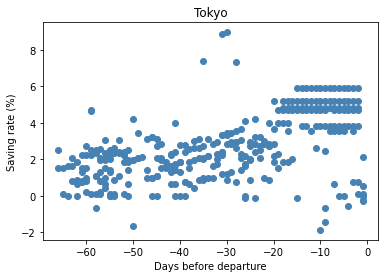

In [13]:
print("Data after outliner removal")

plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

## 1) LR

In [14]:
import numpy as np

x = []
y = []
for index, row in df.iterrows():
    x.append([row['col_days_bf_depart']])
    y.append([row['col_saving_rate']])
    
len(x), len(y)

(333, 333)

Linear regression------------------------------
Coefficients: [[0.04728609]] 
Intercept: [4.08912263]
y_hat = 4.09  +  0.05 x
Mean squared error: 2.47
Mean absolute error: 1.16
Coefficient of determination: 0.25


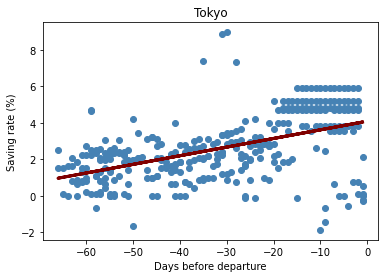

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
lnr_clf = linear_model.LinearRegression()

# Train the model using the training sets
lnr_clf.fit(x, y)

# predit saving rate using train data
lnr_y_pred = lnr_clf.predict(x)

print("Linear regression" + "-"*30)
print("Coefficients: {0} \nIntercept: {1}".format(lnr_clf.coef_, lnr_clf.intercept_))
print("y_hat = %.2f" % lnr_clf.intercept_[0] , ' +  %.2f' % lnr_clf.coef_[0][0], 'x' )

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, lnr_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, lnr_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, lnr_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(x, lnr_y_pred, color = 'maroon', linewidth=3)

plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

## 2) Isotonic

In [16]:
df

route       airline_nm  direct depart_dt col_pre_depart_dt  \
0    LON-to-HND              ANA  direct      24/5        2023-05-24   
1    LON-to-HND              ANA  direct      24/5        2023-05-24   
2    LON-to-HND              ANA  direct      24/5        2023-05-24   
3    LON-to-HND              ANA  direct      24/5        2023-05-24   
4    LON-to-HND              ANA  direct      24/5        2023-05-24   
..          ...              ...     ...       ...               ...   
398  LON-to-HND              ANA  direct      30/5        2023-05-30   
399  LON-to-HND  British Airways  direct      30/5        2023-05-30   
400  LON-to-HND              ANA  direct      30/5        2023-05-30   
401  LON-to-HND  British Airways  direct      30/5        2023-05-30   
402  LON-to-HND              ANA  direct      30/5        2023-05-30   

      search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0    2023-03-25                 -60         908.0                 910.0   
1    2023-03-26                 -59         909.0                 910.0   
2    2023-03-27                 -58         909.0                 910.0   
3    2023-03-28                 -57         908.0                 910.0   
4    2023-03-29                 -56         906.0                 910.0   
..          ...                 ...           ...                   ...   
398  2023-05-27                  -3         875.0                 923.0   
399  2023-05-27                  -3        1059.0                1067.0   
400  2023-05-28                  -2         875.0                 923.0   
401  2023-05-28                  -2        1059.0                1067.0   
402  2023-05-29                  -1         918.0                 923.0   

     col_saving_rate col_day_of_week  
0           0.219780       Wednesday  
1           0.109890       Wednesday  
2           0.109890       Wednesday  
3           0.219780       Wednesday  
4           0.439560       Wednesday  
..               ...             ...  
398         5.200433         Tuesday  
399         0.749766         Tuesday  
400         5.200433         Tuesday  
401         0.749766         Tuesday  
402         0.541712         Tuesday  

[333 rows x 11 columns]

In [17]:
x = df['col_days_bf_depart'].to_numpy()
y = df['col_saving_rate'].to_numpy()

type(x), x.shape, type(y), y.shape

(numpy.ndarray, (333,), numpy.ndarray, (333,))

Iso ------------------------------
param: 
{'increasing': 'auto', 'out_of_bounds': 'nan', 'y_max': None, 'y_min': None}
Mean squared error: 2.29
Mean absolute error: 1.08
Coefficient of determination: 0.31


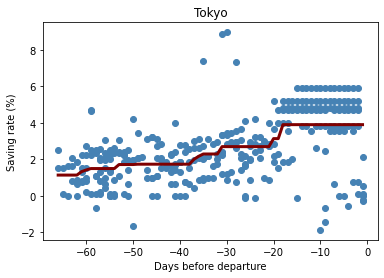

In [18]:
from sklearn.isotonic import IsotonicRegression

# classifier creation
iso_clf = IsotonicRegression(increasing = 'auto')

# train model & predict
iso_y_pred = iso_clf.fit_transform(x, y)

print("Iso " + "-"*30)
print("param: \n{0}".format(iso_clf.get_params()))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
# plt.plot(x, iso_y_pred, color = 'maroon', linewidth=3)
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

In [19]:
iso_clf.X_thresholds_, len(iso_clf.X_thresholds_)

(array([-66., -62., -61., -60., -59., -54., -53., -50., -49., -38., -37.,
        -36., -35., -32., -31., -21., -20., -19., -18.,  -1.]),
 20)

In [20]:
iso_clf.y_thresholds_

array([1.13730841, 1.13730841, 1.32636256, 1.41847984, 1.49506618,
       1.49506618, 1.71507908, 1.71507908, 1.73413017, 1.73413017,
       2.00229513, 2.16683348, 2.29246588, 2.29246588, 2.69556967,
       2.69556967, 3.13538168, 3.13538168, 3.90021111, 3.90021111])

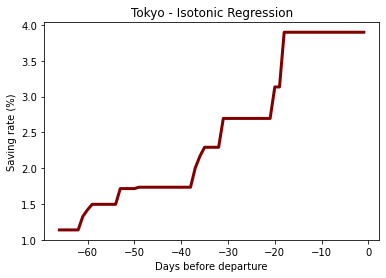

In [21]:
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Tokyo - Isotonic Regression")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Simplify

Simplified Isotonic Regression


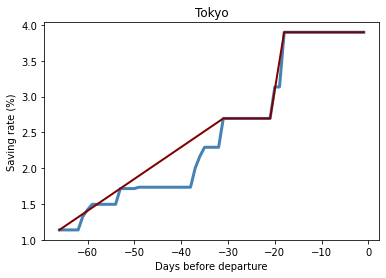

In [22]:
x_sim = [-66 ,-31 ,-21 ,-18 ,-1 ]
y_sim = [1.13730841 ,2.69556967 ,2.69556967 ,3.90021111 ,3.90021111]

print("Simplified Isotonic Regression")
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color="steelblue", linewidth=3, label="Isotonic")
plt.plot(x_sim, y_sim, color="maroon", linewidth=2, label="Isotonic Simplify")

plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Equation

In [23]:
x_sim, y_sim

([-66, -31, -21, -18, -1],
 [1.13730841, 2.69556967, 2.69556967, 3.90021111, 3.90021111])

In [24]:
for i in range(0, len(x_sim)-1):
    print("-"*30, "\n", "{0}: x in [{1},{2}]".format(i+1, x_sim[i], x_sim[i+1]))
    # m = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    b1 = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    print('slope ', b1)

    b0 = get_intercept(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print('intercept ', b0)

    get_linear_equation(b0,b1)

------------------------------ 
 1: x in [-66,-31]
slope  0.044521750285714284
-66 1.13730841 -31 2.69556967 0.044521750285714284
intercept  4.075743928857142
y = 4.08 + 0.04 *x
------------------------------ 
 2: x in [-31,-21]
slope  0.0
-31 2.69556967 -21 2.69556967 0.0
intercept  2.69556967
y = 2.70
------------------------------ 
 3: x in [-21,-18]
slope  0.4015471466666667
-21 2.69556967 -18 3.90021111 0.4015471466666667
intercept  11.12805975
y = 11.13 + 0.40 *x
------------------------------ 
 4: x in [-18,-1]
slope  0.0
-18 3.90021111 -1 3.90021111 0.0
intercept  3.90021111
y = 3.90


### MSE

In [25]:
def predict_HND(x):
    y = 0
    if x >= -66 and x < -31:
        y = 4.08 + 0.04 *x
    elif x >= -31 and x < -21:
        y = 2.70
    elif x >= -21 and x < -18:
        y = 11.13 + 0.40 *x
    else:
        y = 3.90
    return y

Iso (simpliflied)------------------------------
Mean squared error: 2.42
Mean absolute error: 1.13
Coefficient of determination: 0.27


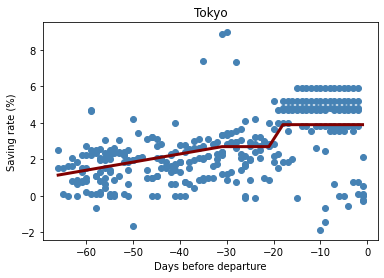

In [26]:
# predict using simpliflied isotonic
iso_y_pred = []
for i in x:
    iso_y_pred.append(predict_HND(i))

print("Iso (simpliflied)" + "-"*30)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color="steelblue")
plt.plot(x_sim, y_sim, color="maroon", linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Result

* price decrease until day -31, and start decrease agiain on day -21. It stay the same on day -18 until departure date